# MNIST tf sequential model trained on AWS- more nodes and extra layer

MNIST data used to train two tf sequential neural nets with two different numbers of nodes (only two hidden layers).
- Accuracy was around 0.95 for the hold out data set
- Possible optimizations:
-- Use alternative optimizer instead of 'adam'

In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import backend as bk
from keras.models import save_model, load_model

Using TensorFlow backend.


In [2]:
#Check that GPU is available on EC2 (should be as it is a GPU instance)
bk.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
Path.cwd()

PosixPath('/home/ubuntu/notebooks')

In [4]:
#Set up dirs for project
base_dir= Path.cwd().parents[0]
data_dir= base_dir/'data'

In [5]:
train_data= pd.read_csv(data_dir/'train_data_std.csv', header= None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
labels= pd.read_csv(data_dir/'train_labels.csv', header= None)
labels.shape

(42000, 1)

In [7]:
labels[0]= labels[0].astype('category')
labels_dummy= pd.get_dummies(labels)
labels_dummy.head()

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [27]:
#build the baseline deep model
base_big= Sequential()
base_big.add(Dense(200, activation= 'relu', input_shape= (784,)))
base_big.add(Dense(200, activation= 'relu'))
base_big.add(Dense(10, activation= 'softmax'))

In [28]:
#compiling the model
base_big.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [29]:
#fitting the model
stopping= EarlyStopping(patience=4)
history_big= base_big.fit(train_data, labels_dummy, epochs=20, validation_split=0.25, callbacks=[stopping])

Train on 31500 samples, validate on 10500 samples
Epoch 1/20
31500/31500 [==============================] - 5s 155us/step - loss: 0.2775 - accuracy: 0.9177 - val_loss: 0.1487 - val_accuracy: 0.9549
Epoch 2/20
31500/31500 [==============================] - 5s 151us/step - loss: 0.1104 - accuracy: 0.9662 - val_loss: 0.1147 - val_accuracy: 0.9649
Epoch 3/20
31500/31500 [==============================] - 5s 151us/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 0.1064 - val_accuracy: 0.9693
Epoch 4/20
31500/31500 [==============================] - 5s 151us/step - loss: 0.0513 - accuracy: 0.9834 - val_loss: 0.0877 - val_accuracy: 0.9734
Epoch 5/20
31500/31500 [==============================] - 5s 151us/step - loss: 0.0390 - accuracy: 0.9871 - val_loss: 0.1139 - val_accuracy: 0.9685
Epoch 6/20
31500/31500 [==============================] - 5s 150us/step - loss: 0.0308 - accuracy: 0.9897 - val_loss: 0.1051 - val_accuracy: 0.9705
Epoch 7/20
31500/31500 [==============================] - 5s 1

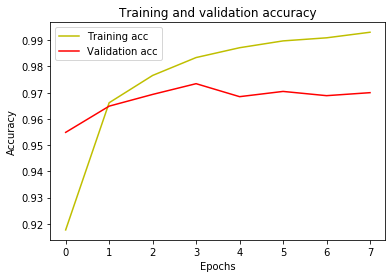

In [30]:
acc_1 = history_big.history['accuracy']
val_acc_1 = history_big.history['val_accuracy']
plt.plot(acc_1, 'y', label='Training acc')
plt.plot(val_acc_1, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
base_big.save(base_dir/'base_big.h5')

In [32]:
#build the deeper deep model
base_big_3layer= Sequential()
base_big_3layer.add(Dense(200, activation= 'relu', input_shape= (784,)))
base_big_3layer.add(Dense(200, activation= 'relu'))
base_big_3layer.add(Dense(200, activation= 'relu'))
base_big_3layer.add(Dense(10, activation= 'softmax'))

In [33]:
#compiling the model
base_big_3layer.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
#fitting the model
extra_layer_history=base_big_3layer.fit(train_data, labels_dummy, epochs=20, validation_split=0.25, callbacks=[stopping])

Train on 31500 samples, validate on 10500 samples
Epoch 1/20
31500/31500 [==============================] - 6s 175us/step - loss: 0.2710 - accuracy: 0.9169 - val_loss: 0.1424 - val_accuracy: 0.9558
Epoch 2/20
31500/31500 [==============================] - 5s 170us/step - loss: 0.1084 - accuracy: 0.9661 - val_loss: 0.1155 - val_accuracy: 0.9654
Epoch 3/20
31500/31500 [==============================] - 5s 171us/step - loss: 0.0797 - accuracy: 0.9750 - val_loss: 0.1071 - val_accuracy: 0.9679
Epoch 4/20
31500/31500 [==============================] - 5s 171us/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.1033 - val_accuracy: 0.9706
Epoch 5/20
31500/31500 [==============================] - 5s 170us/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.1118 - val_accuracy: 0.9708
Epoch 6/20
31500/31500 [==============================] - 5s 170us/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.1089 - val_accuracy: 0.9715
Epoch 7/20
31500/31500 [==============================] - 5s 1

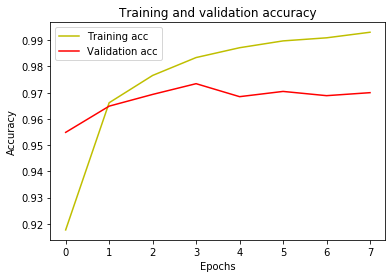

In [35]:
acc_2 = extra_layer_history.history['accuracy']
val_acc_2 = extra_layer_history.history['val_accuracy']
plt.plot(acc_1, 'y', label='Training acc')
plt.plot(val_acc_1, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
base_big_3layer.save(base_dir/'base_big_3layer.h5')